<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/Weather_DBSCAN(Q_15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [ ]:
data = pd.read_csv("weather.csv")

In [ ]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
data.shape

(366, 22)

In [ ]:
# Drop irrelevant or non-numeric columns (e.g., Station Name, ID)
data_numeric = data.select_dtypes(include=[np.number])

# Handle missing values
data_numeric = data_numeric.dropna()

In [ ]:
# --- Step 3: Feature Selection ---
# Select meaningful features for clustering
# (You can modify based on dataset columns)
features = data_numeric.columns
X = data_numeric[features].values

In [ ]:
# --- Step 4: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# --- Step 5: Apply DBSCAN Clustering ---
# eps = neighborhood radius
# min_samples = minimum number of points to form a dense region
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)


# Add cluster labels to original data
data_numeric['Cluster'] = labels

In [ ]:
# --- Step 6: Identify Outliers ---
# DBSCAN assigns outliers as label = -1
outliers = data_numeric[data_numeric['Cluster'] == -1]
print(f"\nTotal Outliers Detected: {len(outliers)}")


Total Outliers Detected: 354


In [ ]:
# --- Step 7: Dimensionality Reduction for Visualization (PCA 2D) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

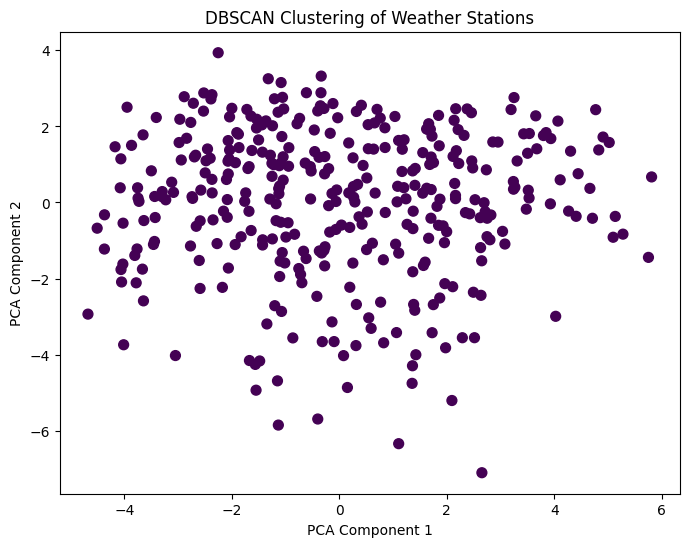

In [ ]:
# --- Step 8: Visualization of Clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Weather Stations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

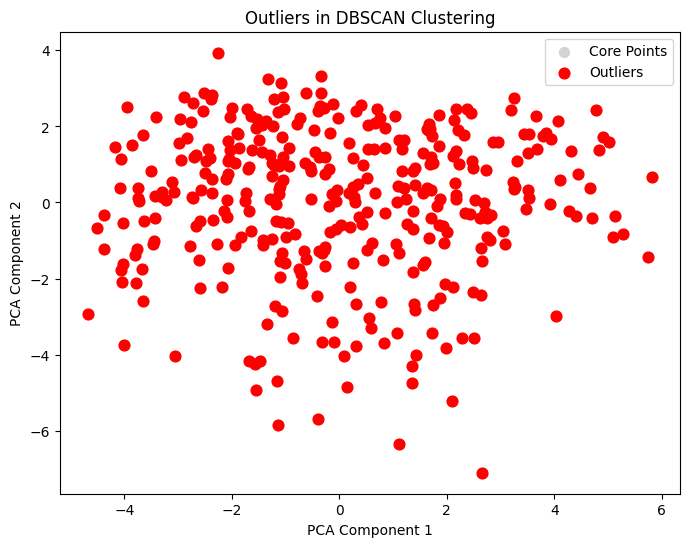

In [ ]:
# --- Step 9: Visualization of Outliers ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgray', s=50, label='Core Points')
plt.scatter(
    X_pca[labels == -1, 0],
    X_pca[labels == -1, 1],
    c='red',
    s=60,
    label='Outliers'
)
plt.title("Outliers in DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [ ]:
# --- Step 10: Cluster Summary ---
cluster_summary = data_numeric.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
          MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Cluster                                                                        
-1       7.362429  20.601412  1.420904     4.558192  7.925424      40.011299   

         WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Cluster                                                                      
-1           9.666667     18.014124    71.875706    44.454802  1019.562147   

         Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm   RISK_MM  
Cluster                                                                   
-1        1016.69209  3.920904  4.019774  12.438701  19.271469  1.448588  


In [ ]:
import plotly.express as px

# --- Interactive 2D Visualization of DBSCAN Clusters ---
# Create a DataFrame for visualization
viz_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': labels
})

# Add original data columns to hover information
for col in data_numeric.columns:
    viz_df[col] = data_numeric[col].values

# Plot using Plotly
fig = px.scatter(
    viz_df,
    x='PCA1',
    y='PCA2',
    color=viz_df['Cluster'].astype(str),
    title='Interactive DBSCAN Clustering of Weather Stations',
    hover_data=data_numeric.columns,
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Customize appearance
fig.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    width=900, height=600,
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    legend_title="Cluster Label"
)

fig.show()


In [ ]:
import plotly.express as px

# --- Prepare Data for Interactive Plot ---
outlier_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': labels
})

# Add the original numeric columns for hover info
for col in data_numeric.columns:
    outlier_df[col] = data_numeric[col].values

# Assign color categories (Outlier = -1)
outlier_df['Point_Type'] = np.where(outlier_df['Cluster'] == -1, 'Outlier', 'Core Point')

# --- Create Interactive Scatter Plot ---
fig_outliers = px.scatter(
    outlier_df,
    x='PCA1',
    y='PCA2',
    color='Point_Type',
    title='Interactive DBSCAN Outlier Visualization',
    hover_data=data_numeric.columns,
    color_discrete_map={'Outlier': 'red', 'Core Point': 'lightgray'},
)

# --- Customize Plot Appearance ---
fig_outliers.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')))
fig_outliers.update_layout(
    width=900,
    height=600,
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2",
    legend_title="Point Type"
)

# --- Display Interactive Plot ---
fig_outliers.show()
